# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**

1. Определить рыночную стоимость объектов недвижимости.
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
3. Установить какие факторы влияют на ценообразование стоимости квартир.

**Ход исследования**

Данные о недвижимости я получу из файла 'datasets/real_estate_data.csv'. О качестве данных ничего неизвестно. Поэтому перед тем, как приступать к целям ииследования, понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на ииследование. Затем на этапе преобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее создам необходимые столбцы и приступлю к проведению исследовательского анализа.

Таким образом, моё исследование пройдёт в 7 этапов:
1. Обзор данных.
2. Предобработка данных.
3. Расчеты и добавление результатов в таблицу.
4. Проведение анализа для Ленинградской области.
5. Проведение анализа для Санкт-Петербурга.
6. Различаются ли факторы, которые влияет на ценообразование квартир.
7. Написание общего вывода.

### Откройте файл с данными и изучите общую информацию. 

#### Импорт данных из csv-файла в датафрейм и сохранение в переменной `data`.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

#### Ознакомление с данными. Вывод первых 20 строк.


In [12]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Описание данных.

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — общая площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

#### Вывод основной информации о датафрейме.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Общая гистограмма для всех числовых столбцов таблицы

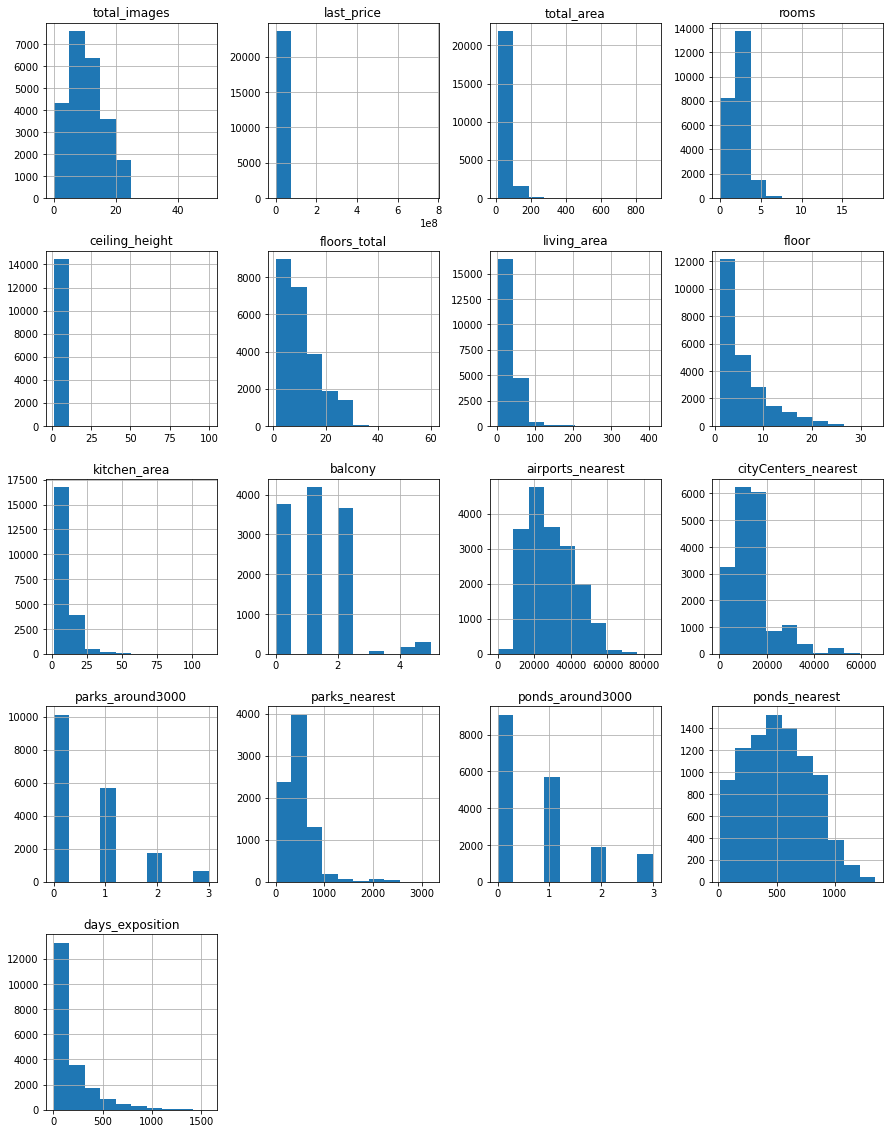

In [14]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### Поиск пропущенных значений и анализ причин пропусков данных.

In [15]:
#data.isna().mean(axis=0)
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Есть пропуски в следующих столбцах:
+ *airports_nearest — расстояние до ближайшего аэропорта в метрах (м)*
+ *cityCenters_nearest — расстояние до центра города (м)*
+ *parks_nearest — расстояние до ближайшего парка (м)*
+ *ponds_nearest — расстояние до ближайшего водоёма (м)*

Данные о расстоянии подтягиваются автоматически, значит пропуски в данных появились из-за технологического сбоя.

+ *balcony — число балконов*

Скорее всего, продавцы умышленно не указывали число балконов, т.к. в квартире их нет. 

+ *is_apartment — апартаменты*

Тип данных должен быть булев тип, а не object как сейчас, т.к. столбец содержит категориальные значения. 
88,29% жилых помещений и 11,71% коммерческих - похоже на правду.  

+ *days_exposition — сколько дней было размещено объявление (от публикации до снятия)*

Скорее всего, на момент создания архива не все квартиры были проданы, а значит и объявления не были сняты с публикации.

+ *ceiling_height — высота потолков (м)*

Возможно, в квартире стандартная высота потолков или продавец не знал точную высоту, поэтому поле не было заполнено.

+ *floors_total — всего этажей в доме*

Т.к. датасет хранит данные о квартирах, то количество этажей должно быть указано во всех объявлениях. Возможно, пропуски возникли из-за того, что в датасете есть данные о таун-хаусах, у которых только 1 этаж, поэтому продавец сознательно решил не заполнять это поле. А возможно, 0,36% продавцов случайно оставили это поле пустым.

+ *kitchen_area — площадь кухни в квадратных метрах (м²)*

Если квартиры свободный планировки или студии , то площадь кухни продавцы могут не указать.
9.6% пропусков - значительная часть данных. Причиной пропусков может быть и человеческий фактор, и технологический сбой.

+ *living_area — жилая площадь в квадратных метрах (м²)*

Если продаются апартаменты, то жилой прощади там нет, поэтому продавцы могли не заполнять это поле. 
В 8% объявлений не указана жилая площадь, в то время как апартаментов в данных 11,7%.

+ *locality_name — название населённого пункта*

0,2% пропусков в столбце - возможен и технологический сбой, и человеческий фактор.

+ *parks_around3000 — число парков в радиусе 3 км*
+ *ponds_around3000 — число водоёмов в радиусе 3 км*

23,28% пропусков в обоих столбцах говорит о том, что часть продавцов предпочли не заполнять эти поля.

#### Заполнение пропусков в столбце "balcony".

In [16]:
data['balcony'] = data['balcony'].fillna(value=0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Заполнение пропусков в столбце "ceiling_height" медианным значением потолков.

In [17]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Изучение пропусков в столбце "floors_total".

In [18]:
len(data.loc[(data['floors_total'].isna()) & (data['floor']!=1)])

83

In [19]:
len(data.loc[(data['floors_total'].isna()) & (data['floor']==1)])

3

Гипотеза об одноэтажных квартирных домах подтвердилась частично - для 3 случаев из 86. 

0,36% пропусков в столбцах - процент несущественный. Удалим такие строки.

In [20]:
data.dropna(subset=['floors_total'], inplace = True)

#### Изучение пропусков в столбце "kitchen_area".

In [21]:
len(data.loc[data['studio'] == True]) / len(data) * 100

0.6183034768983188

In [22]:
len(data.loc[data['open_plan'] == True]) / len(data) * 100

0.2837420065218312

Гипотеза о том, что площадь кухни не указана только у студий и квартир свободной планировки, не подтвердилась.

Студий всего 0.61% от общего числа квартир, квартир со свободной планировкой - 0.28%,
в то время как пропусков в поле "kitchen_area" - 9.6%. Удаляем такие строки.

In [23]:
data.dropna(subset=['kitchen_area'], inplace = True)

#### Изучение пропусков в оставшихся столбцах.

Остались следующие столбцы с пропусками:
+ airports_nearest 
+ cityCenters_nearest
+ parks_nearest
+ ponds_nearest 
+ locality_name
+ parks_around3000
+ ponds_around3000 

Невозможно заменить пропуски в указанных выше столбцах на средние, медианные или стандартные значения. Процент пропусков в 
этих столбцах больше 10%, поэтому удалить строки из датафрейма не можем. Данные в этих столбцах оставляем без изменений. 

#### Изменение типа данных столбца "is_apartment" и заполнение пропусков в столбцах "is_apartment" и "living_area".

In [24]:
data['is_apartment'] = data['is_apartment'].astype(bool)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21382 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21382 non-null  int64  
 1   last_price            21382 non-null  float64
 2   total_area            21382 non-null  float64
 3   first_day_exposition  21382 non-null  object 
 4   rooms                 21382 non-null  int64  
 5   ceiling_height        21382 non-null  float64
 6   floors_total          21382 non-null  float64
 7   living_area           20943 non-null  float64
 8   floor                 21382 non-null  int64  
 9   is_apartment          21382 non-null  bool   
 10  studio                21382 non-null  bool   
 11  open_plan             21382 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               21382 non-null  float64
 14  locality_name         21343 non-null  object 
 15  airports_nearest   

In [25]:
len(data.loc[data['is_apartment'] == False]) / len(data) * 100

11.925918997287438

11,9% жилых квартир в продаже от общего числа - однозначно что-то тут не так. Т.к. апартаменты - это не жилые помещения, то для всех квартир, у которых указана площадь жилого помещения, поставим значение False в поле "is_apartment".

In [26]:
data.loc[data['living_area'] > 0,'is_apartment'] = False

In [27]:
len(data.loc[data['is_apartment'] == True]) / len(data) * 100

1.8379945748760638

1.83% апартаментов от общего числа квартир и 8,03% пропусков в данных о жилой площади -  в пропусках данных о жилой площади апартаментов ставим значение 0.

In [28]:
data.loc[data['is_apartment'] == True,'living_area'] = 0

In [29]:
data['living_area'].isna().mean()

0.0021513422504910672

Доля пропусков в столбце "living_area" снизилась с 0.0803 до 0.0022, т.е. в 36,5 раз!

Удаляем строки с оставшимися пропусками в столбце living_area.

In [30]:
data.dropna(subset=['living_area'], inplace = True)

Обновляем типы данных до корректных.

In [31]:
data['balcony'] = data['balcony'].astype('int')

In [32]:
data['floors_total'] = data['floors_total'].astype('int')

#### Изучение дубликатов.

Проверим датафрейм на наличие явных дубликатов.

In [33]:
data.duplicated().sum()

0

В датафрейме явных дубликатов нет. Плюс в копилочку однородности данных.

Поле 'locality_name' хранит категориальные значения. Посмотрим уникальные значения в этом поле.

In [34]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

In [ ]:
len(data['locality_name'].unique())

In [ ]:
def replace_name(false_values, true_values):
    for false_values in false_values:
        data['locality_name'] = data['locality_name'].str.replace(false_values,true_values)
        
duplicates = ['городской поселок ', 'городской посёлок ', 'поселок городского типа ', 'коттеджный поселок ',\
              'посёлок городского типа ', 'село ', 'посёлок при железнодорожной станции ', 'коттеджный посёлок ',\
              'поселок при железнодорожной станции ', 'поселок станции ', 'посёлок станции ']

name = ''
replace_name(duplicates, name)

In [ ]:
len(data['locality_name'].unique())

In [ ]:
duplicates2 = ['поселок ', 'посёлок ']
name2 = ''
replace_name(duplicates2, name2)

In [ ]:
len(data['locality_name'].unique())

#### Выявление и обработка аномалий.

Посмотрим, есть ли аномалии в столбце ceiling_height.

In [ ]:
data.boxplot(column='ceiling_height', figsize=(10,10));

In [ ]:
data.boxplot(column='ceiling_height', figsize=(10,10));
plt.ylim(32)

In [ ]:
data['ceiling_height'].describe()

Стандартное отклонение очень высокое относительно среднего значения - это говорит о наличии выбросов в этом столбце. Например, высота потолков в 100м очень настораживает. В прочем, значения высоты потолков выше 10м тоже трудно поддаются объяснению. Рассмотрим диаграмму размаха в укрупненном масштабе.

In [ ]:
data.boxplot(column='ceiling_height', figsize=(10,10));
plt.ylim(0, 33)

Выявлены аномально высокие значения потолков. В части значений допустим, что ошибся продавец при заполнении (например, 27м, 25м, 32м). Изменим такие значения на приемлемые. 

In [ ]:
for row in data['ceiling_height']:
    if row == 27:
        row = 2.7
    elif row == 25:
        row = 2.5
    elif row == 32:
        row = 3.2
    elif row == 20:
        row = 2
    elif row == 26:
        row = 2.6
    elif row == 22.6:
        row = 2.26
    elif row == 27.5:
        row = 2.75
    elif row == 24:
        row = 2.4

Ещё укрупним диаграмму.

In [ ]:
data.boxplot(column='ceiling_height', figsize=(10,10));
plt.ylim(0, 6)

"Усы" около 2.8 судя по диаграмме. Ограничивать таким числом высоту потолков в нашей выборке не совсем разумно. Примем верхнее значение высоты потолков исходя из частоты значений на диаграмме размаха - 5.3.
Значения больше 5.3 м считаем выбросами, так как они выходят за границы "усов" диаграммы размаха.

Посмотрим, есть ли аномально низкие высоты потолков?

In [ ]:
data['ceiling_height'][data['ceiling_height'] < 2].value_counts()

Интересная квартира - потолок высотой всего 1м, и как там живут? Считаем такие значения выбросами и убираем из выборки строки с аномально низкими и высокими потолками.

In [ ]:
data = data[(data['ceiling_height'] < 5.3)&(data['ceiling_height'] > 2)]

In [ ]:
data['ceiling_height'].describe()

Стандартное отклонение снизилось. Значит идём по верному пути.

Поищем аномальные значения в столбце *total_area*.

In [ ]:
data.boxplot(column='total_area', figsize=(10,10));

In [ ]:
data['total_area'].describe()

Рассмотрим укрупненно диаграмму размаху.

In [ ]:
data.boxplot(column='total_area', figsize=(10,10));
plt.ylim(0, 500)

In [ ]:
data[data['total_area']>110].value_counts('total_area', ascending=False)

Чем больше площадь квартиры, тем они реже встречаются. Логично, стандартная планировка не предполагает квартир с такими площадями. "Ус" диаграммы размаха заканчивается на значении 110 кв.м. Не считаю это значение корректным, т.к. квартиры с площадью 120 кв.м. вполне часто встречаются. Считаем выбросами значения больше чем 390, т.к. в этом значении диаграмма начинает прерываться. Проверим, много ли строк это затронет.

In [ ]:
data[data['total_area']>390].value_counts('total_area', ascending=False)

Единичные значения. Смело удаляем строки.

In [ ]:
data = data[data['total_area'] < 390]

По минимальной площади проверим значения на положительность. Игнорируем нижний "ус" диаграммы размаха и принимаем минимальное значений общей площади равное 4 кв.м. Проверим, существуют ли объявления с такими значениями.

In [ ]:
data[data['total_area'] < 4]

Таких объявлений и не было в архиве данных.

In [ ]:
len(data)

23 699 - столько строк было в изначальном датафрейме. Посмотрим в процентном соотношении на сколько сократились данные.

In [ ]:
(1-len(data)/23699)*100

**Вывод:**

На 23,76% сократился датафрейм при выполнении предобработки данных. Датафрейм весьма неоднородный. Большое количество могло отрицательно повлиять на исследовательский анализ.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец с ценой за квадратный метр.

In [ ]:
data['price_for_meter'] = round(data['last_price']/data['total_area'])

In [ ]:
data['price_for_meter']

Добавим столбцы с днём недели, месяцем и годом публикации объявлений.

In [ ]:
data['first_day_exposition'] = pd.DatetimeIndex(pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'))

In [ ]:
data['exposition_weekday'] = pd.DatetimeIndex(pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')).weekday

In [ ]:
data['exposition_month'] = pd.DatetimeIndex(pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')).month

In [ ]:
data['exposition_year'] = pd.DatetimeIndex(pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')).year

Добавим столбец с типами этажа: первый, последний и другой.

In [ ]:
def types_floor (row):
    floor = row['floor']
    total_floors = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == total_floors:
        return 'последний'
    else:
        return 'другой'

data['type_floor'] = data.apply(types_floor, axis = 1)

In [ ]:
data.head()

Добавим столбец с расстоянием до центра города в километрах.

In [ ]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

### Проведите исследовательский анализ данных

#### Изучение параметров объектов.

##### Изучим данные об общей площади.

In [ ]:
data['total_area'].hist(bins=20, figsize=(13, 5), range=(0,data['total_area'].max()))
plt.xlabel('Общая площадь, м')
plt.ylabel('Количество продаж')

Есть редкие случаи объявлений с квартирами площадью больше 200 кв.м. Укрупним диаграмму.

Рассмотрим график подробнее.

In [ ]:
data['total_area'].hist(bins=100, figsize=(13, 5), range=(0,200))
plt.xlabel('Общая площадь, м')
plt.ylabel('Количество продаж')

Большая часть квартир имеет площадь до 100 кв.м. 

##### Изучим данные о жилой площади.

In [ ]:
data['living_area'].hist(bins=100, figsize=(13, 5), range=(0,data['living_area'].max()))
plt.xlabel('Жилая площадь, м')
plt.ylabel('Количество продаж')

В большинстве квартир жилая площадь до 50 кв.м. Есть редкие объявления с жилой площадью больше 150 кв.м., что свойственно для больших квартир и коррелируется с графиком для общей площади.

##### Изучим данные о площади кухни.

In [ ]:
data['kitchen_area'].hist(bins=100, figsize=(13, 5), range=(0,data['kitchen_area'].max()))
plt.xlabel('Площадь кухни, м')
plt.ylabel('Количество продаж')

In [ ]:
# Укрупняем диаграмму

data['kitchen_area'].hist(bins=100, figsize=(13, 5), range=(0,20))
plt.xlabel('Площадь кухни, м')
plt.ylabel('Количество продаж')

Значительная часть квартир имеет площадь кухни примерно от 5 до 12 кв.м. Есть редкие случаи квартир с площадью кухни больше 50 кв.м.

##### Изучим данные о цене объектов.

In [ ]:
data['last_price'].hist(bins=100, figsize=(18, 5), range=(0,data['last_price'].max()))
plt.xlabel('Стоимость квартиры, 100 млн')
plt.ylabel('Количество продаж')

In [ ]:
# Укрупняем диаграмму размаха

data['last_price'].hist(bins=100, figsize=(18, 5), range=(0,15000000))
plt.xlabel('Стоимость квартиры, 10 млн')
plt.ylabel('Количество продаж')

Большая часть квартир продавалась по последней цене 4 млн рублей. В продаже есть квартиры дороже 10 млн рублей, но такие объявления редкие.

##### Изучим данные о количестве комнат.

In [ ]:
data['rooms'].hist(bins=22, figsize=(13, 5), range=(0,data['rooms'].max()))
plt.xlabel('Количество комнат')
plt.ylabel('Количество продаж')

In [ ]:
data['rooms'].hist(bins=8, figsize=(13, 5), range=(0, 8))
plt.xlabel('Количество комнат')
plt.ylabel('Количество продаж')

Пики гистограммы приходятся на 1 и 2 комнаты. Есть редкие случаи квартир с количеством комнат больше 8.

##### Изучим данные о высоте потолков.

In [ ]:
data['ceiling_height'].hist(bins=100, figsize=(13, 5), range=(0,data['ceiling_height'].max()))
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество продаж')

In [ ]:
# Укрупняем диаграмму

data['ceiling_height'].hist(bins=30, figsize=(13, 5), range=(2.4, 3.4))
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество продаж')

В квартирах высота потолков чаще всего примерно 2.7м. Но есть и квартиры с высокими потолками выше 3м.

##### Изучим данные об этаже квартир.

In [ ]:
data['floor'].hist(bins=33, figsize=(13, 5), range=(0,data['floor'].max()))
plt.xlabel('Этаж')
plt.ylabel('Количество продаж')

В исходных данных преобладают квартиры на втором этаже.

In [ ]:
data['type_floor'].hist(bins=3, figsize=(12, 5))
plt.xlabel('Тип этажа')
plt.ylabel('Количество продаж')

Чаще всего продают квартиры, находящиеся не на первом и не на последнем этаже.

##### Изучим данные об общем количестве этажей.

In [ ]:
data['floors_total'].hist(bins=60, figsize=(13, 5), range=(0,data['floors_total'].max()))
plt.xlabel('Всего этажей')
plt.ylabel('Количество продаж')

Больше всего продают квартир в 6-этажных и 10-этажных домах. Есть объявления о продаже квартир в домах этажностью 30 этажей и большей, но таких мало.

##### Изучим данные о расстоянии до центра города в метрах.

In [ ]:
data['cityCenters_nearest'].hist(bins=33, figsize=(13, 5), range=(0,data['cityCenters_nearest'].max()))
plt.xlabel('Удалённость от центра города, м')
plt.ylabel('Количество продаж')

In [ ]:
# Укрупняем диаграмму

data['cityCenters_nearest'].hist(bins=35, figsize=(13, 5), range=(0,35000))
plt.xlabel('Удалённость от центра города, м')
plt.ylabel('Количество продаж')

Чаще всего квартиры находятся на расстоянии от 1300м до центра города. Но есть квартиры, удалённые от центра города аж на 35км.

##### Изучим данные о расстоянии до ближайшего аэропорта.

In [ ]:
data['airports_nearest'].hist(bins=42, figsize=(17,5), range=(0,data['airports_nearest'].max()))
plt.xlabel('Удаленность от аэропорта, м')
plt.ylabel('Количество продаж')

In [ ]:
# Укрупняем

data['airports_nearest'].hist(bins=55, figsize=(17,5), range=(0,55000))
plt.xlabel('Удаленность от аэропорта, м')
plt.ylabel('Количество продаж')

Чаще всего квартиры продаются на расстоянии 19км и 25км от аэропорта. Если учесть, что аэропорт Пулково находится на расстоянии 23км от центра города, а Санкт-Петербург территориально вытянутый, данные выглядят вполне правдоподобно. Также есть квартиры, находящиеся на расстоянии 70км от аэропорта.

##### Изучим данные о расстоянии до ближайшего парка.

In [ ]:
data['parks_nearest'].hist(bins=32, figsize=(17,5), range=(0,data['parks_nearest'].max()))
plt.xlabel('Удаленность от парка, м')
plt.ylabel('Количество продаж')

In [ ]:
# Укрупняем

data['parks_nearest'].hist(bins=100, figsize=(17,5), range=(0,1000))
plt.xlabel('Удаленность от парка, м')
plt.ylabel('Количество продаж')

Пики графика приходятся на значении 400 м. Но есть и квартиры, от которых парки удалены на расстояние более 2км.

##### Изучим данные о дне и месяце публикации объявления.

In [ ]:
data['exposition_month'].hist(bins=12, figsize=(17,5), range=(0,data['exposition_month'].max()))
plt.xlabel('Месяц публикации')
plt.ylabel('Количество продаж')

Удивительный факт, но чаще всего публикуют объявления о продаже квартиры в декабре (Новый год - время перемен?). И вообще нет продаж в январе. Летом же продажи падаю.

In [ ]:
#x = np.array(['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс'])


data['exposition_weekday'].hist(bins=7, range=(0, 6))
#plt.title()
plt.xlabel('День недели публикации')
plt.ylabel('Количество продаж')
#plt.xticks(x)

Объявления чаще всего публикуются в будни - есть не ярко выраженные пики во вторник и четверг. В выходные дни публикуют объявления примерно в 2 раза реже - возможно, это связано с графиком работы риелторов, к которым продавцы обращаются за помощью в продаже.

#### Изучим, как быстро продавались квартиры

In [ ]:
data['days_exposition'].describe()

Судя по описанию данных, в среднем квартиры продаются в течение 189 дней. Но есть и единичные случаи, когда объявления были размещены дольше чем на 730 дней, т.е. объявления были размещены и не сняты с публикации дольше, чем 2 года. Узнаем среднее и медианное время продажи квартиры и посмотрим диаграмму размаха.

In [ ]:
data['days_exposition'].mean()

In [ ]:
data['days_exposition'].median()

In [ ]:
data.boxplot(column='days_exposition', figsize=(10,10));

"Ус" диаграммы размаха заканчивается на значении примерно 520. На мой взгляд, вполне нормальная практика, когда квартира продаётся больше года, т.к. продавец не спешит. Нужно ли считать такие значения выбросами? Анализируем дальше и примем, что продажи квартир больше 520 дней необычно долгие. И их много.

In [ ]:
data[data['days_exposition']>520]['days_exposition'].value_counts()

Медианное время более точно описывает сколько времени занимает продажа. Продажи квартир менее чем за 102 дня можно считать быстрыми. Продажи квартир более чем за 520 дня можно считать необычно долгими. Значения после 999 стремятся к нулю, и если отбросить значения больше 999 много данных не потеряется. 

In [ ]:
data = data.query('days_exposition < 999')

#### Изучим факторы, влияющие на стоимость объекта

##### Изучим зависимость цены от общей площади квартиры

In [ ]:
data.pivot_table(index='total_area', values='last_price', aggfunc='median')
data.plot(x='total_area', y='last_price', grid=True,  figsize=(12,5), kind='scatter')
    
plt.xlabel('Общая площадь, м')
plt.ylabel('Стоимость квартиры, шаг графика - 100 млн')
plt.title('Зависимость цены от общей площади квартиры')
plt.xlim(0, 650)
plt.ylim(0, 200000000)

#sns.pairplot(data[['total_area', 'last_price']])

Рассчитаем коэффициент корреляции Пирсона - чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем очивидее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе. 

In [ ]:
data['total_area'].corr(data['last_price'])

Коэффициент корреляции Пирсона равна 0.64. Зависимость между стоимостью квартиры и общей площадью  подтверждается.

##### Изучим зависимость цены от жилой площади квартиры

In [ ]:
data.pivot_table(index='living_area', values='last_price', aggfunc='median')
data.plot(x='living_area', y='last_price', grid=True,  figsize=(12,5), kind='scatter')
    
plt.xlabel('Жилая площадь, м')
plt.ylabel('Стоимость квартиры, шаг графика - 100 млн')
plt.title('Зависимость цены от жилой площади квартиры')
plt.xlim(-10, 450)
plt.ylim(0, 200000000)
 
#sns.pairplot(data[['living_area', 'last_price']])

Рассчитаем коэффициент корреляции Пирсона - чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем очивидее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе.

In [ ]:
data['living_area'].corr(data['last_price'])

Коэффициент корреляции Пирсона равен 0.48. Зависимость между стоимостью квартиры и жилой площадью явно прослеживается.

##### Изучим зависимость цены от площади кухни в квартире

In [ ]:
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
data.plot(x='kitchen_area', y='last_price', grid=True,  figsize=(12,5), kind='scatter')
    
plt.xlabel('Площадь кухни, м')
plt.ylabel('Стоимость квартиры, шаг графика - 100 млн')
plt.title('Зависимость цены квартиры от площади кухни')
plt.xlim(-3, 120)
plt.ylim(0, 200000000)

#sns.pairplot(data[['kitchen_area', 'last_price']])

Рассчитаем коэффициент корреляции Пирсона - чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем очивидее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе.

In [ ]:
data['kitchen_area'].corr(data['last_price'])

Коэффициент корреляции Пирсона равен 0.51. Зависимость между стоимостью квартиры и площадью кухни явно прослеживается.

##### Изучим зависимость цены от количества комнат

In [ ]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median')
data.plot(x='rooms', y='last_price', grid=True,  figsize=(12,5), kind='scatter')
    
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры, шаг графика - 100 млн')
plt.title('Зависимость цены квартиры от количества комнат')
plt.xlim(-0.5, 20)
plt.ylim(0, 200000000)

#sns.pairplot(data[['rooms', 'last_price']])

Рассчитаем коэффициент корреляции Пирсона - чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем очивидее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе.

In [ ]:
data['rooms'].corr(data['last_price'])

Коэффициент корреляции Пирсона равен 0.35. Зависимость между стоимостью квартиры и количеством комнат явно прослеживается, хоть и чуть менее явно, чем зависимость стоимости квартиры от жилой площади.

##### Изучим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

In [ ]:
#.pivot_table(index='type_floor', values='last_price', aggfunc='median')
data.plot(x='type_floor', y='last_price', kind='scatter')
    
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость квартиры, шаг графика - 100 млн')
plt.title('Зависимость цены квартиры от типа этажа')
plt.ylim(0, 200000000)

#sns.pairplot(data[['type_floor', 'last_price']])

По диаграмме рассеивания видно, что квартиры, которые находятся не на первом и не на последнем этаже, продаются чаще и дороже, чем квартиры на первом или на последнем этаже. Логично, т.к. это этажи считаются не самыми удобными для жизни.

##### Изучим зависимость цены от даты размещения (день недели, месяц, год)

In [ ]:
data.pivot_table(index='exposition_weekday', values='last_price', aggfunc='median')
data.plot(x='exposition_weekday', y='last_price', grid=True,  figsize=(12,5), kind='scatter')
    
plt.xlabel('День недели публикации объявления: пн, вт, ср, чт, пт, сб, вс')
plt.ylabel('Стоимость квартиры, шаг графика - 100 млн')
plt.title('Зависимость цены квартиры от дня публикации объявления')
plt.xlim(-0.5, 6.5)
plt.ylim(0, 200000000)

#sns.pairplot(data[['exposition_weekday', 'last_price']])

Рассчитаем коэффициент корреляции Пирсона - чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем очивидее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе.

In [ ]:
data['exposition_weekday'].corr(data['last_price'])

Коэффициент корреляции Пирсона близок к нулю. Зависимость между стоимостью квартиры и днём недели публикации объявления не обнаружена.

In [ ]:
data.pivot_table(index='exposition_month', values='last_price', aggfunc='median')
data.plot(x='exposition_month', y='last_price', grid=True,  figsize=(12,5), kind='scatter')
    
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Стоимость квартиры, шаг графика - 100 млн')
plt.title('Зависимость цены квартиры от месяца публикации объявления')
plt.xlim(-0.5, 12.5)
plt.ylim(0, 200000000)

#sns.pairplot(data[['exposition_month', 'last_price']])

Рассчитаем коэффициент корреляции Пирсона - чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем очивидее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе.

In [ ]:
data['exposition_month'].corr(data['last_price'])

Коэффициент корреляции Пирсона близок к нулю. Зависимость между стоимостью квартиры и месяцем публикации объявления не обнаружена.

In [ ]:
data.pivot_table(index='exposition_year', values='last_price', aggfunc='median')
data.plot(x='exposition_year', y='last_price', grid=True,  figsize=(12,5), kind='scatter')
    
plt.xlabel('Год публикации')
plt.ylabel('Стоимость квартиры, шаг графика - 100 млн')
plt.title('Зависимость цены квартиры от года публикации объявления')
#plt.xlim(-0.5, 20)
plt.ylim(0, 200000000)

#sns.pairplot(data[['exposition_year', 'last_price']])

Рассчитаем коэффициент корреляции Пирсона - чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем очивидее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе.

In [ ]:
data['exposition_year'].corr(data['last_price'])

Коэффициент корреляции Пирсона близок к нулю. Зависимость между стоимостью квартиры и годом публикации объявления не обнаружена.

Прослеживается очевидная линейная связь между стоимостью квартиры и следующими параметрами:
+ жилая площадь,
+ площадь кухни,
+ количество комнат.

Линейной связи между стоимостью квартиры и общей площадью не обнаружено. Возможно, коэффициент нулевой не потому, что связи между значениями нет, а из-за того, что у неё более сложный, не линейный характер.

А также есть зависимость стоимости квартиры от этажа, на котором расположена квартира (первый, последний, другой) - квартиры, находящиеся не на первом, не на последнем этаже продаются чаще и дороже.

Зависимостей между стоимостью квартиры и днём, месяцем или годом публикации объявления не обнаружено. 

##### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Посмотрим, в каких населённых пунктах самые высокая и низкая стоимости квадратного метра:

In [ ]:
city_price_for_meter = data.groupby('locality_name')['price_for_meter'].mean().sort_values(ascending=False).round().to_frame().reset_index()
city_price_for_meter

Интересный населённый пункт с затейливым названием Лисий Нос - стоимость квадратного метра там выше чем во второй столице нашей родины. Ну и вполне закономерно, что самый дешевый квадратный метр недвижимости можно приобрести в деревнях.

In [ ]:
# Посмотрим топ-10 населённых пунктов с наибольшим числом объявлений.

#top_10_city = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
#top_10_city = tuple(top_10_city)

#top_10_city = data.groupby('locality_name')['price_for_meter'].mean().sort_values(ascending=False).round().head(10)
top_10_city = data['locality_name'].value_counts().sort_values(ascending=False).head(10).reset_index()
#top_10_city['index'] = top_10_city.index
top_10_city.columns = ['locality_name','count']
top_10_city

In [ ]:
top_10_city_price_for_meter = top_10_city.merge(city_price_for_meter, on='locality_name', how='left')
top_10_city_price_for_meter
#top_10_city = top_10_city.index.tolist()
#city_price_for_meter = city_price_for_meter[city_price_for_meter['city'] in top_10_city]

In [ ]:
top_10_city_price_for_meter.plot(x='locality_name', y='price_for_meter', grid=True,  figsize=(15,5), kind='bar') 
                          
plt.title('Средняя цена за квадратный метр')
plt.xlabel('Топ-10 городов по количеству объявлений')
plt.ylabel('Средняя цена квадратного метра, рубли')


In [ ]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

##### Вычислим среднюю цену километра в Санкт-Петербурге

Посчитаем среднюю стоимость квартиры в зависимости от удаленности от центра. Стоимость квартир переведём в миллионы.

In [ ]:
cost_km_spb = data[data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest_km')['last_price'].mean()/1000000
cost_km_spb

Визуализируем данные.

In [ ]:
cost_km_spb.plot(style='o-', figsize=(12, 5), grid=True)
plt.xlabel('Расстояние от центра Санкт-Петербурга, километры')
plt.ylabel('Стоимость квартиры, миллионы')
plt.title('Средняя цена квартиры в зависимости от удаленности от центра Санкт-Петербурга')

Проверим выбивающиеся значения на наличие выбросов.

###### для 3 км от центра Санкт-Петербурга

In [ ]:
data[(data['locality_name'] == 'Санкт-Петербург')&(data['cityCenters_nearest_km'] == 3)]['last_price'].sort_values()/1000000

Посмотрим минимальные и максимальные цены на квартиры в этом срезе.

In [ ]:
data[(data['locality_name'] == 'Санкт-Петербург')&(data['cityCenters_nearest_km'] == 3)&(data['last_price'] == 2385000.0)]

In [ ]:
data[(data['locality_name'] == 'Санкт-Петербург')&(data['cityCenters_nearest_km'] == 3)&(data['last_price'] == 87000000.0)]

Значения строк для самых дешевой и дорогой квартиры на 3 км от центра города выглядят логично: самая дешевая квартира площадью всего 20 кв.м. и жилой площади не имеет, а самая дорогая квартира имеет площадь 283 кв.м. и похожа не пентхаус.

###### для 6 км от центра Санкт-Петербурга

In [ ]:
data[(data['locality_name'] == 'Санкт-Петербург')&(data['cityCenters_nearest_km'] == 6)]['last_price'].sort_values()/1000000

In [ ]:
data[(data['locality_name'] == 'Санкт-Петербург')&(data['cityCenters_nearest_km'] == 6)&(data['last_price'] == 245000000.0)]

Строка со стоимостью квартиры в 245 млн очень похожа на выброс. Посмотрим на 2 место по дороговизне квартир на 6 км от центра Спб.

In [ ]:
data[(data['locality_name'] == 'Санкт-Петербург')&(data['cityCenters_nearest_km'] == 6)&(data['last_price'] == 150000000.0)]

На 2 месте расположилось 2 квартиры: одна - апартаменты с площадью 500 кв.м., вторая - жилая квартира с площадью 230 кв.м. Корректнее сравнивать с жилой квартирой. Допускаем, что пентхаус с площадью на 55.7 кв.м. больше, будет стоить дороже  на 95 млн, чем обычная жилая квартира с меньшей площадью.

**Так с чем же может быть связано необычное поведение графика в отрезке от 3 до 7 по оси абсцисс?**

Возможно, на расстояние 3 км от города продаётся много небольших коммерческих помещений ввиду удачного географического положения. Апартаменты дешевле в цене, чем жилые помещения (это можно заметить по столбцу price_for_meter), и из-за этого наблюдаем спад стоимости квартир на графике. Возможно, нужно больше однородных данных, чтобы анализ был точнее.

###### для 27 км от центра Санкт-Петербурга

После спада в значении 3 по оси абсцисс график ведёт себя вполне закономерно, кроме точки со значением 27 по оси абсцисс - там наблюдается неожиданный рост. Посмотрим внимательнее строки, приводящие к этому всплеску.

In [ ]:
data[(data['locality_name'] == 'Санкт-Петербург')&(data['cityCenters_nearest_km'] == 27)]['last_price'].sort_values()/1000000

In [ ]:
data[(data['locality_name'] == 'Санкт-Петербург')&(data['cityCenters_nearest_km'] == 27)&(data['last_price'] == 2250000.0)]

In [ ]:
data[(data['locality_name'] == 'Санкт-Петербург')&(data['cityCenters_nearest_km'] == 27)&(data['last_price'] == 14350000.0)]

Если первая строка не вызывает сомнения, то вторая строка вызывает вопрос: почему такое большое значение price_for_meter? Однозначно принимаем это значение за выброс.

In [ ]:
data = data[data.price_for_meter != 193919.0]

In [ ]:
data[data['last_price'] == 14350000.0]

Проверим "хвост" графика - значения 28 и 29 по оси абсцисс

In [ ]:
# Смотрим значения для 28 км

data[(data['locality_name'] == 'Санкт-Петербург')&(data['cityCenters_nearest_km'] == 28)]['last_price'].sort_values()/1000000

In [ ]:
# Посмотрим строку с самой дорогой квартирой в этом сегменте

data[(data['locality_name'] == 'Санкт-Петербург')&(data['cityCenters_nearest_km'] == 28)&(data['last_price'] == 7600000.0)]

In [ ]:
# Смотрим значения для 29 км

data[(data['locality_name'] == 'Санкт-Петербург')&(data['cityCenters_nearest_km'] == 29)]['last_price'].sort_values()/1000000

Получаем итоговую среднюю среднюю цену километра в Санкт-Петербурге:

In [ ]:
cost_km_spb = data[data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest_km')['last_price'].mean()/1000000
cost_km_spb

In [ ]:
cost_km_spb.plot(style='o-', figsize=(12, 5), grid=True)
plt.xlabel('Расстояние от центра Санкт-Петербурга, километры')
plt.ylabel('Стоимость квартиры, миллионы')
plt.title('Средняя цена квартиры в зависимости от удаленности от центра Санкт-Петербурга')

По графику можно сделать вывод, что чем дальше квартира от центра города, тем она дешевле, что логично. Наличие скачков в конце графика можно объяснить недостаточностью данных в этом сегменте.

### Общий вывод

Было проведено исследование с целью выявления влияния различных факторов на стоимость квартиры. Входные данные - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Результаты исследования будут полезны:
+ при оценке стоимости квартиры и длительности продажи,
+ при проектировании автоматизированной системы, которая отследит аномалии и мошенническую деятельность,
+ при оценке факторов, влияющих на ценообразование.

Перед проведением исследования были сформулированы следующие гипотезы:
- Гипотеза 1 - Общая площадь влияет на стоимость квартиры.
- Гипотеза 2 - Жилая площадь влияет на стоимость квартиры.
- Гипотеза 3 - Площадь кухни влияет на стоимость квартиры.
- Гипотеза 4 - Количество комнат влияет на стоимость квартиры.
- Гипотеза 5 - Этаж, на котором расположена квартира (первый, последний, другой), влияет на стоимость квартиры.
- Гипотеза 6 - Дата размещения (день недели, месяц, год) влияет на стоимость квартиры.
- Гипотеза 7 - Удалённость квартиры от центра города влияет на стоимость квартиры.

В результате удалось выявить определенные зависимости.

**Гипотеза 1 подтверждена:** общая площадь напрямую влияет на стоимость квартиры.

- Коэффициент корреляции Пирсона равен 0.64. Явная зависимость между стоимостью квартиры и жилой площадью.

Рекомендации: провести дополнительный анализ зависимости общей площади от стоимости квартиры.

**Гипотеза 2 подтверждена:** жилая площадь влияет на стоимость квартиры.

- Коэффициент корреляции Пирсона равен 0.48 - зависимость между стоимостью квартиры и жилой площадью явно прослеживается.

**Гипотеза 3 подтверждена:** площадь кухни влияет на стоимость квартиры.

- Коэффициент корреляции Пирсона равен 0.51 - зависимость между стоимостью квартиры и площадью кухни явно прослеживается.

**Гипотеза 4 подтверждена:** количество комнат влияет на стоимость квартиры.

- Коэффициент корреляции Пирсона равен 0.35 - зависимость между стоимостью квартиры и количеством комнат явно прослеживается, хоть и чуть менее явно, чем зависимость стоимости квартиры от жилой площади.

**Гипотеза 5 частично подтверждена:** этаж, на котором расположена квартира (первый, последний, другой), влияет на стоимость квартиры.

- Квартиры, которые находятся не на первом и не на последнем этаже, продаются чаще и дороже, чем квартиры на первом или на последнем этаже.

**Гипотеза 6 не подтверждена:** дата размещения (день недели, месяц, год) влияет на стоимость квартиры.

- Зависимостей между стоимостью квартиры и днём, месяцем или годом публикации объявления не обнаружено - коэффициенты корреляции Пирсона близки к нулю (0.01, 0.01 и -0.05 соотвественно). 

**Гипотеза 7 подтверждена:** удалённость квартиры от центра города влияет на стоимость квартиры.

- Квартиры в центре города стоят в среднем 30.49 млн рублей.
- Квартиры, находящиеся на расстояние 29 км от центра города стоят в среднем 4.53 млн рублей.


**Общие наблюдения:**
1. Медианное время продажи квартиры - 102 дней. Среднее время продажи квартиры - 185 дней.

2. Продажи квартир менее чем за 102 дня можно считать быстрыми. Продажи квартир более чем за 520 дней можно считать необычно долгими.

3. Самый дорогой квадратный метр недвижимости в Лисим Носе - 10369 рублей/кв.м.
Самый дешёвый квадратный метр недвижимости в деревне Старополье - 113768 рублей/кв.м.


**Общие рекомендации:**
1. Специалистам по оценке стоимости недвижимости рекомендую использовать зависимости из 1, 2, 3, 4, 5 и 7 гипотез (об общей площади, о жилой площади, о площади кухни, о количестве комнат и об удалённости квартиры).

Обзора данных выполнялся согласно следующим этапам:
1. Обзор данных.
2. Предобработка данных.
3. Расчеты и добавление результатов в таблицу.
4. Проведение анализа для Ленинградской области.
5. Проведение анализа для Санкт-Петербурга.
6. Различаются ли факторы, которые влияет на ценообразование квартир.
7. Написание общего вывода.